# Extreme Value Analysis for Outliers

### Outlier Detection

* Most machine learning methods assume that your data has been treated for outliers
* Detecting outliers can be a data preprocessing task or ana analytical method of its own merit

### Outlier Analysis Use Cases

Use outlier detection to uncover anomalies that represent:

* Equipment failure
* Fraud
* Cybersecurity Events


### Methods of Outlier Detection

## Univariate Method: 

| Tukey Boxplot | 
|--|
| Outliers |
| -- |
| Upper quartile | 25% of data points are **greater** than this value  
| |
| |
| Median | Interquartile Range (IQR)
| |
| |
| Lower quartile | 25% of data points are **less** than this value
| --|
| Outliers |

Boxplot whiskers are set to 1.5 IQR (-- in the table above). If you see data points past this whiskers they're outliers.

IQR (or *spread*) the distance between the first quartile (at 25%) and the third quartile (at 75%)

a = Q1 - 1.5 IQR  
b = Q3 + 1.5 IQR  

If...

* min. value < a or... 
* max. value > b, then 

The variable is suspect for outlier 


In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
from matplotlib import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [32]:
iris_source = '../../inputs/iris.data.csv'
df = pd.read_csv(iris_source)

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
X = df.iloc[:,0:4].values # all numbers
Y = df.iloc[:,4].values # the text

### Identifying outliers from Tukey boxplot

[]

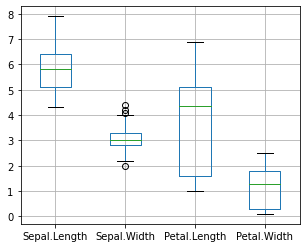

In [14]:
df.boxplot(return_type='dict')
plt.plot()

In [15]:
# Sepal.Width has dots in > 4 and < 2.05 let's isolate it and work with it

sepal_width = X[:,1]
iris_outliers = (sepal_width > 4)
df[iris_outliers]
# we have 3 values

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [17]:
iris_outliers = (sepal_width < 2.05)
df[iris_outliers]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
60,5.0,2.0,3.5,1.0,versicolor


### Applying Tukey outlier labeling

In [22]:
pd.options.display.float_format = '{:.1f}'.format
x_df = pd.DataFrame(X)
print(x_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


Take a look athe column labeled 1:

IQR = 3.3 - 2.8 = 0.5 
(1.5)IQR = 0.75 

2.8 - 0.75 = 2.05
3.3 + 0.75 = 4.05 

min and max values are less and greater that this values so they are suspected to be outliers

## Multivariate Method:

Use multivariate methods to find the outliers that only show up within combination of observations from two or more different variables.

In [25]:
import seaborn as sb 
sb.set_style('whitegrid')

### Visually inspecting boxplots

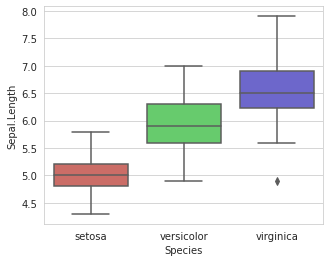

In [33]:
data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df[:5]

sb.boxplot(x='Species', y='Sepal.Length', data=df, palette='hls')
# Now we see one outlier for virginica

### Looking at the scatterplot matrix

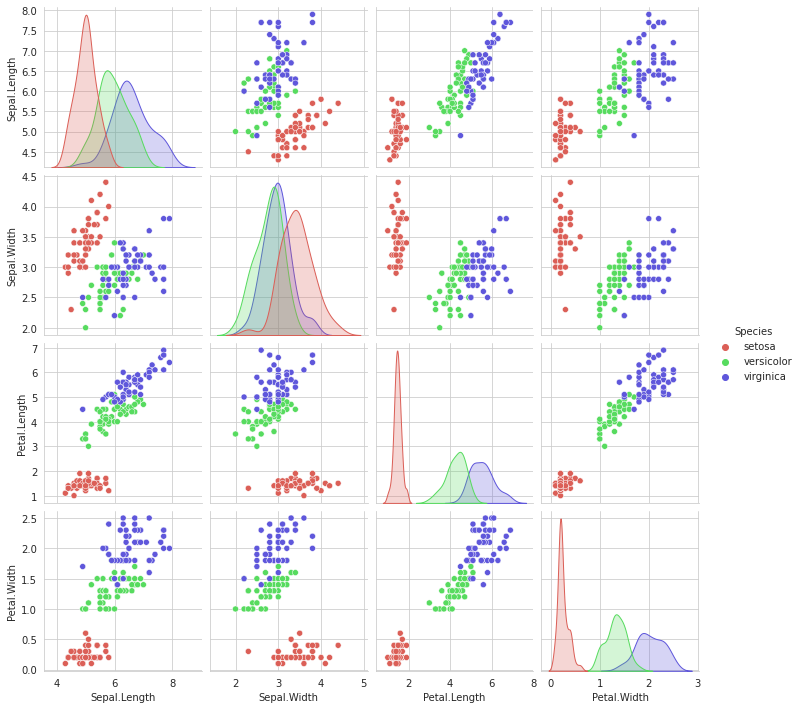

In [36]:
sb.pairplot(df, hue='Species', palette='hls')

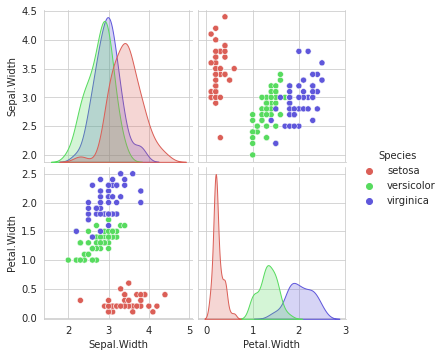

In [39]:
# Notice that outlier at Sepal.Width ~ 2.3 and Petal.Width ~ 0.25
# Let's plot them
sb.pairplot(df[['Sepal.Width', 'Petal.Width', 'Species']], hue='Species', palette='hls')